In [1]:
import requests
import pandas as pd
import seaborn as sns
import json
import time
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
with open('default-cards-20220101100237.json', encoding='utf-8') as f:
    data = json.load(f)

In [3]:
#convert mana cost string into cmc
def get_cmc(manastring):
    mana = manastring.replace('{', '')
    mana = mana.replace('}', '')
    hybrids = mana.count('/')
    mana = len(mana) - 2 * hybrids

    return mana

In [4]:
year = []
text = []
mana = []
type_line = []
rarity = []
border_color = []
standard = []
modern = []
pioneer = []
legacy = []
vintage = []
colors= []
name = []


#loop through cards, append relevant data to lists
for i in range(0, len(data)):
    card = data[i]
    #remove bonus and special cards
    if card['rarity'] == 'bonus' or card['rarity'] == 'special':
        continue
    try:        
        card_year =card['released_at'][0:4]
        card_text =len(card['oracle_text'])
        card_mana =card['cmc']
        card_type_line =card['type_line']
        #remove tokens
        if 'Token' in card_type_line:
            continue
        card_rarity = card['rarity']
        card_border_color =card['border_color']
        card_color = ''.join(card['colors'])
        card_name = card['name']

        standard.append(True) if card['legalities']['standard'] == 'legal' else standard.append(False)
        modern.append(True) if card['legalities']['standard'] == 'legal' else modern.append(False)       
        pioneer.append(True) if card['legalities']['standard'] == 'legal' else pioneer.append(False)       
        legacy.append(True) if card['legalities']['standard'] == 'legal' else legacy.append(False)     
        vintage.append(True) if card['legalities']['standard'] == 'legal' else vintage.append(False)
        
        year.append(card_year)

        text.append(card_text)

        mana.append(card_mana)

        type_line.append(card_type_line)

        rarity.append(card_rarity)

        border_color.append(card_border_color)
        
        colors.append(card_color)
        
        name.append(card_name)
        
    except:
        try:
            card_text = 0
            card_color = ''
            card_Mana = 0
            for face in card['card_faces']:
                card_year =card['released_at'][0:4]
                card_text +=len(face['oracle_text'])
                card_mana += get_cmc(face['mana_cost'])
                card_type_line =face['type_line']
                card_rarity = card['rarity']
                card_border_color =card['border_color']
                card_name = card['name']
                try:
                    card_color += ''.join(face['colors'])
                except:
                    card_color= ''.join(card['colors'])
            
            standard.append(True) if card['legalities']['standard'] == 'legal' else standard.append(False)
            modern.append(True) if card['legalities']['standard'] == 'legal' else modern.append(False)       
            pioneer.append(True) if card['legalities']['standard'] == 'legal' else pioneer.append(False)       
            legacy.append(True) if card['legalities']['standard'] == 'legal' else legacy.append(False)     
            vintage.append(True) if card['legalities']['standard'] == 'legal' else vintage.append(False)
            year.append(card_year)

            text.append(card_text)

            mana.append(card_mana)

            type_line.append(card_type_line)

            rarity.append(card_rarity)

            border_color.append(card_border_color)

            colors.append(card_color)
            
            name.append(card_name)
        except:
            print(f'error at {i}')

error at 1320
error at 11725
error at 15346
error at 17142
error at 26303
error at 63912


In [5]:
df = pd.DataFrame({'Year':year, 'Text':text, 'CMC':mana, 'Type':type_line, 'Rarity':rarity, 'Border Color':border_color, 'Color':colors, 'Standard':standard, 'Modern':modern,'Pioneer':pioneer, 'Legacy':legacy, 'Vintage':vintage, 'Name':name})
#Remove 0 text lands and most minigame cards
df.drop(df[df['Text'] == 0.0].index, inplace = True)
df.drop(df[df['Text'] > 700].index, inplace = True)

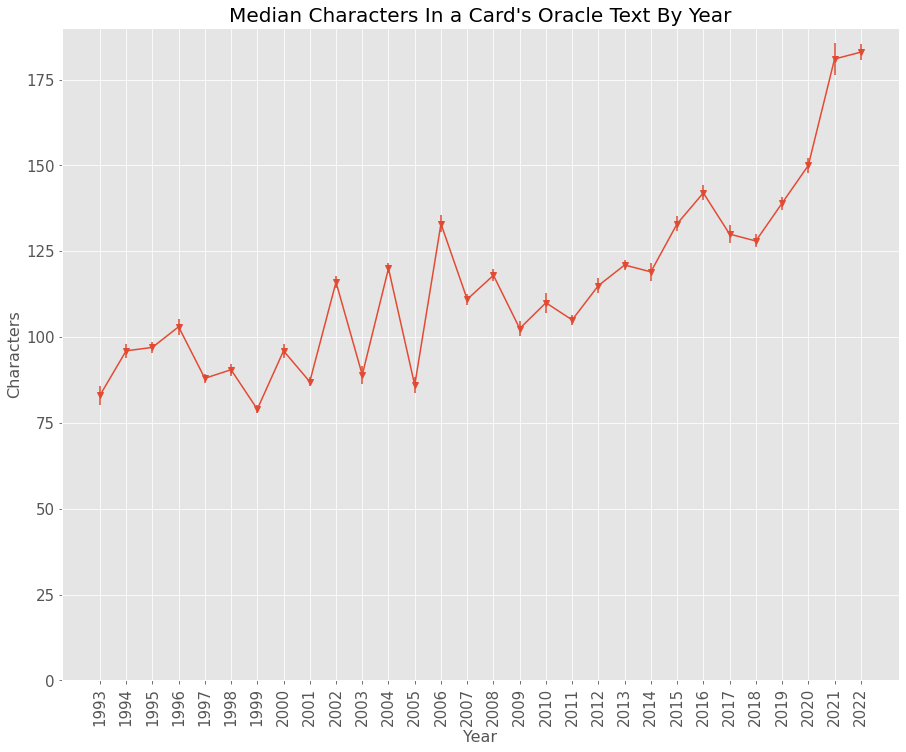

In [22]:
yeardf = df.groupby('Year').median()
err = []

for year in df['Year'].unique():
    err.append(stats.sem(df[df['Year'] == year]['Text']))

yeardf['err'] = err

plt.style.use('ggplot')
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

fig, ax = plt.subplots()
fig.set_size_inches([15, 12])
ax.errorbar(yeardf.index, yeardf['Text'], yerr=yeardf['err'], marker = 'v')
ax.set_title("Median Characters In a Card's Oracle Text By Year", fontsize = 20)
ax.set_ylabel('Characters', fontsize = 16)
ax.set_xlabel('Year', fontsize= 16)
ax.set_ylim(0,190)



plt.xticks(rotation=90)
plt.savefig('Text by Year.png')
plt.show()


C:\Users\Brian\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Brian\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


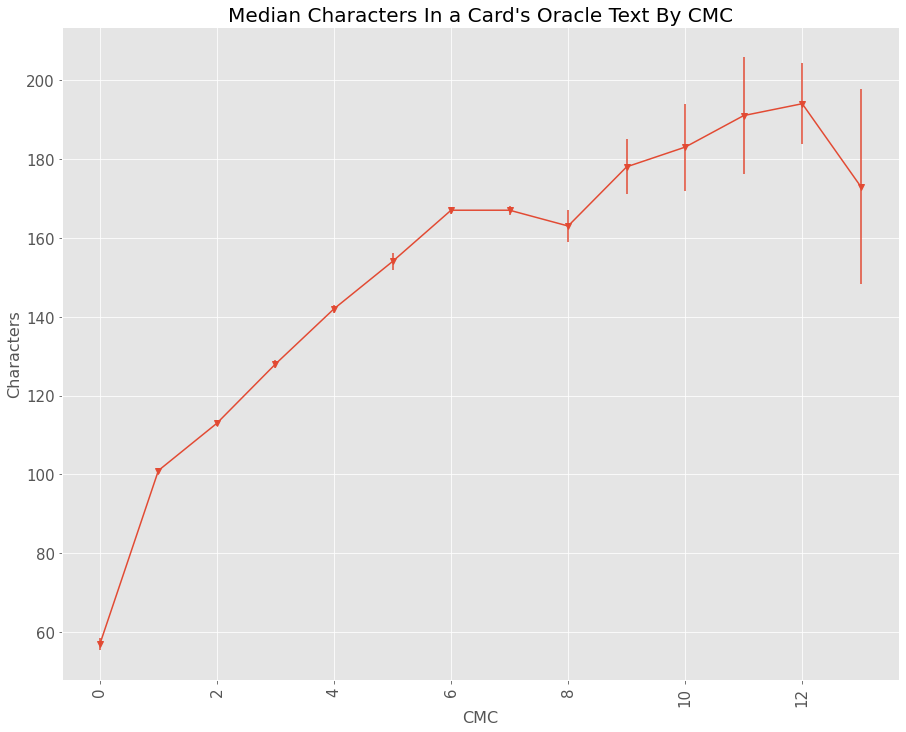

In [23]:
manadf = df.groupby('CMC').median()
err = []

for cost in df['CMC'].unique():
    err.append(stats.sem(df[df['CMC'] == cost]['Text']))

manadf['err'] = err

manadf= manadf.head(14)

plt.style.use('ggplot')
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

fig, ax = plt.subplots()
fig.set_size_inches([15, 12])
ax.errorbar(manadf.index, manadf['Text'], yerr=manadf['err'], marker = 'v')
ax.set_title("Median Characters In a Card's Oracle Text By CMC", fontsize = 20)
ax.set_ylabel('Characters', fontsize = 16)
ax.set_xlabel('CMC', fontsize= 16)



plt.xticks(rotation=90)
plt.savefig('Text by CMC.png')
plt.show()


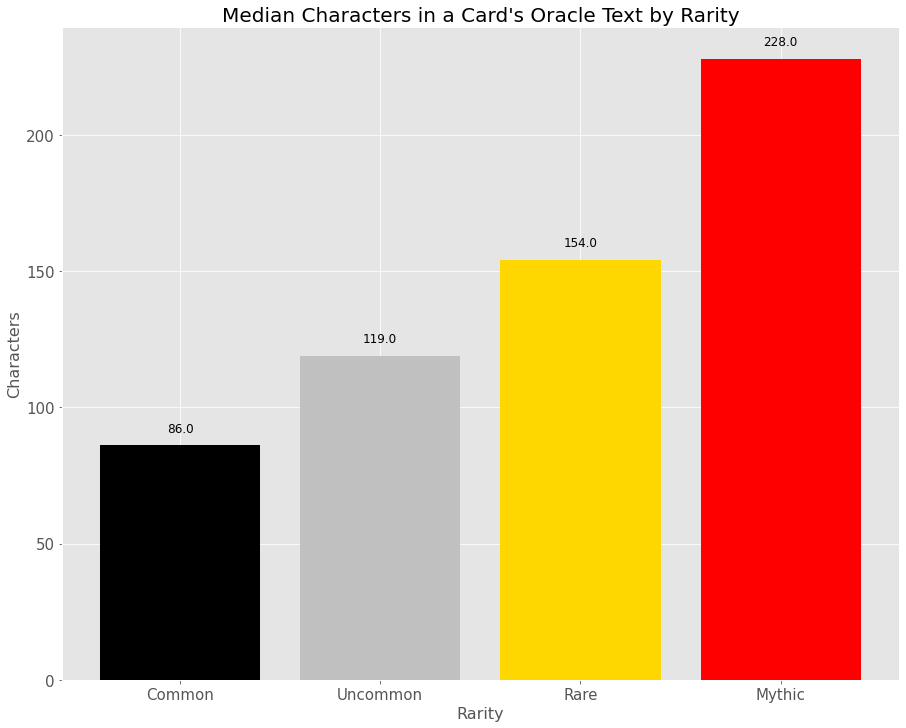

In [17]:
raritydf = df.drop(df[df['Rarity'] == 'bonus' ].index)
raritydf.drop(df[df['Rarity'] == 'special' ].index, inplace=True)
raritydf = raritydf.groupby('Rarity').median()
raritydf = raritydf.reindex(['common', 'uncommon', 'rare', 'mythic'])

fig, ax = plt.subplots()
ax.bar(['Common', 'Uncommon', 'Rare', 'Mythic'], raritydf['Text'], color = ['black', 'silver', 'gold', 'red'])
fig.set_size_inches([15, 12])
ax.set_title("Median Characters in a Card's Oracle Text by Rarity", fontsize = 20)
ax.set_xlabel('Rarity', fontsize=16)
ax.set_ylabel('Characters', fontsize=16)
for i in range(0, 4):
    plt.text(['Common', 'Uncommon', 'Rare', 'Mythic'][i], raritydf['Text'][i]  + 5, raritydf['Text'][i], ha='center', size = 'large')
plt.savefig('Text by Rarity.png')
plt.show()

In [40]:
whitedf = df[df['Color'].str.contains('W')]
bluedf = df[df['Color'].str.contains('U')]
blackdf = df[df['Color'].str.contains('B')]
reddf = df[df['Color'].str.contains('R')]
greendf = df[df['Color'].str.contains('G')]
colorlessdf = df[df['Color'] == '']


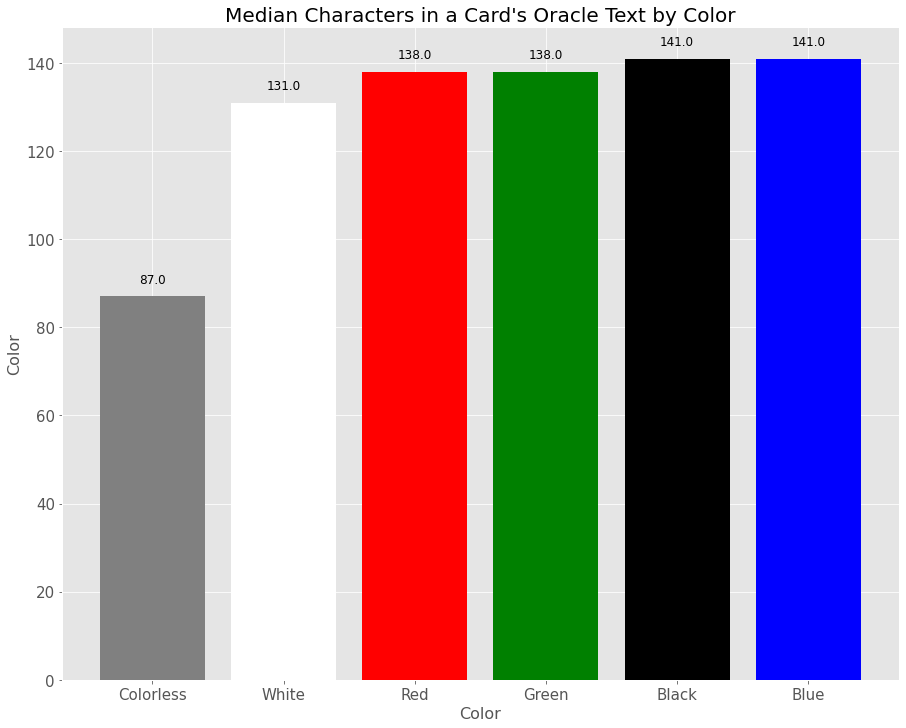

In [47]:
x = ['Colorless', 'White', 'Red', 'Green', 'Black', 'Blue']
y = [colorlessdf['Text'].median(), whitedf['Text'].median(), reddf['Text'].median(), greendf['Text'].median(), blackdf['Text'].median(),bluedf['Text'].median()]

fig, ax = plt.subplots()
ax.bar(x, y, color =['grey', 'white', 'red', 'green', 'black', 'blue'])
fig.set_size_inches([15, 12])
ax.set_title("Median Characters in a Card's Oracle Text by Color", fontsize = 20)
ax.set_xlabel('Color', fontsize = 16)
ax.set_ylabel('Color', fontsize = 16)
for i in range(0, len(y)):
    plt.text(x[i], y[i] + 3, y[i], ha='center', size = 'large')
plt.savefig('Text by Color.png')


In [12]:
#creature type, fill each column, add as cols to df, and use those to make the type charts
creature = []
artifact = []
sorcery = []
instant = []
enchantment = []
planeswalker = []
legend = []

for card in df['Type']:
    if 'Creature' in card:
        creature.append(True)
    else:
        creature.append(False)
        
    if 'Artifact' in card:
        artifact.append(True)
    else:
        artifact.append(False)
        
    if 'Sorcery' in card:
        sorcery.append(True)
    else:
        sorcery.append(False)
        
    if 'Instant' in card:
        instant.append(True)
    else:
        instant.append(False)
        
    if 'Enchantment' in card:
        enchantment.append(True)
    else:
        enchantment.append(False)
        
    if 'Planeswalker' in card:
        planeswalker.append(True)
    else:
        planeswalker.append(False)
        
    if 'Legend' in card:
        legend.append(True)
    else:
        legend.append(False)        

In [13]:
df['Creature'] = creature
df['Artifact'] = artifact
df['Sorcery'] = sorcery
df['Instant'] = instant
df['Enchantment'] = enchantment
df['Planeswalker'] = planeswalker
df['Legend'] = legend
df

,Year,Text,CMC,Type,Rarity,Border Color,Color,Standard,Modern,Pioneer,Legacy,Vintage,Name,Creature,Artifact,Sorcery,Instant,Enchantment,Planeswalker,Legend
0,2006,40,6.0,Creature — Sliver,uncommon,black,R,False,False,False,False,False,Fury Sliver,True,False,False,False,False,False,False
1,2009,118,2.0,Creature — Kor Soldier,common,black,W,False,False,False,False,False,Kor Outfitter,True,False,False,False,False,False,False
2,2017,249,3.0,Creature — Siren Pirate,common,black,U,False,False,False,False,False,Siren Lookout,True,False,False,False,False,False,False
3,1994,197,1.0,Enchantment — Aura,rare,white,G,False,False,False,False,False,Web,False,False,False,False,True,False,False
4,2019,77,1.0,Creature — Human Knight,uncommon,black,W,False,False,False,False,False,Venerable Knight,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64273,2015,162,3.0,Artifact,uncommon,black,,False,False,False,False,False,Angel's Tomb,False,True,False,False,False,False,False
64274,1997,44,2.0,Instant,common,white,U,False,False,False,False,False,Boomerang,False,False,False,True,False,False,False
64275,2009,170,0.0,Plane — Luvion,rare,black,,False,False,False,False,False,Celestine Reef,False,False,False,False,False,False,False
64276,2003,29,3.0,Creature — Troll,common,white,G,False,False,False,False,False,Horned Troll,True,False,False,False,False,False,False


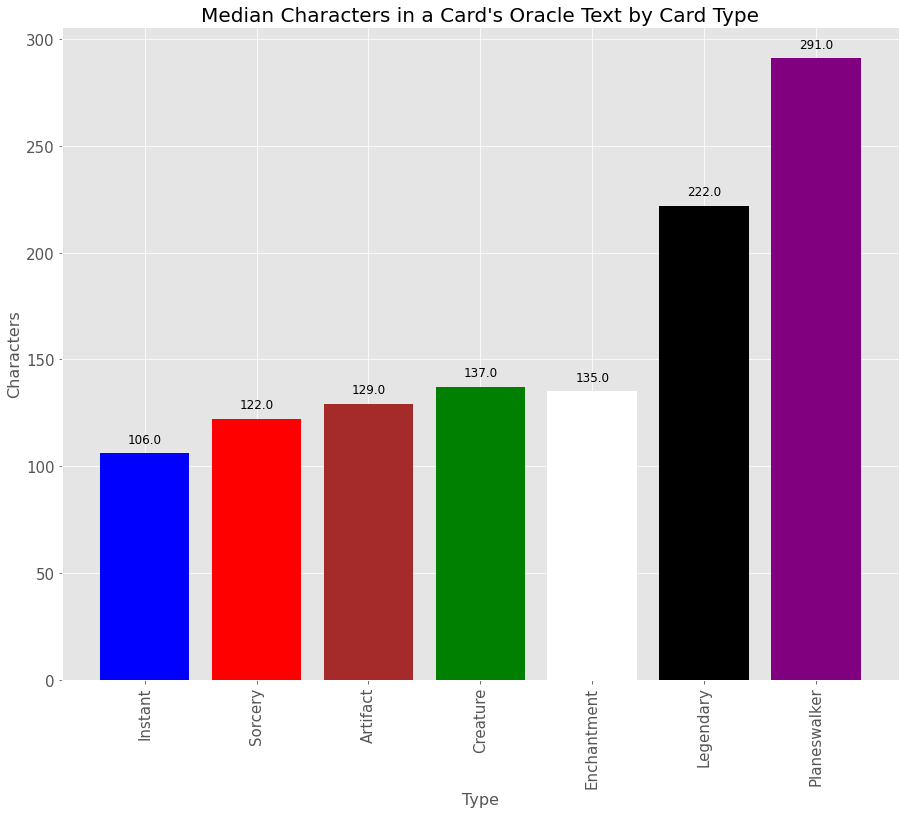

In [14]:
creaturedf = df[df['Creature'] == True]
artifactdf = df[df['Artifact'] == True]
sorcerydf = df[df['Sorcery'] == True]
instantdf = df[df['Instant'] == True]
enchantmentdf = df[df['Enchantment'] == True]
planeswalkerdf = df[df['Planeswalker'] == True]
legenddf = df[df['Legend'] == True]

fig, ax = plt.subplots()
x= ['Instant', 'Sorcery', 'Artifact', 'Creature',  'Enchantment', 'Legendary', 'Planeswalker']
y = [instantdf['Text'].median(), sorcerydf['Text'].median(), artifactdf['Text'].median(), creaturedf['Text'].median(), enchantmentdf['Text'].median(), legenddf['Text'].median(), planeswalkerdf['Text'].median()]
ax.bar(x, y, color = ['blue', 'red', 'brown', 'green', 'white', 'black', 'purple'])
plt.xticks(rotation = 90)
fig.set_size_inches([15, 12])
ax.set_title("Median Characters in a Card's Oracle Text by Card Type", fontsize = 20)
ax.set_xlabel('Type', fontsize=16)
ax.set_ylabel('Characters', fontsize=16)
for i in range(0, len(y)):
    plt.text(x[i], y[i] + 5, y[i], ha='center', size = 'large')
plt.savefig('Text by Card Type.png')

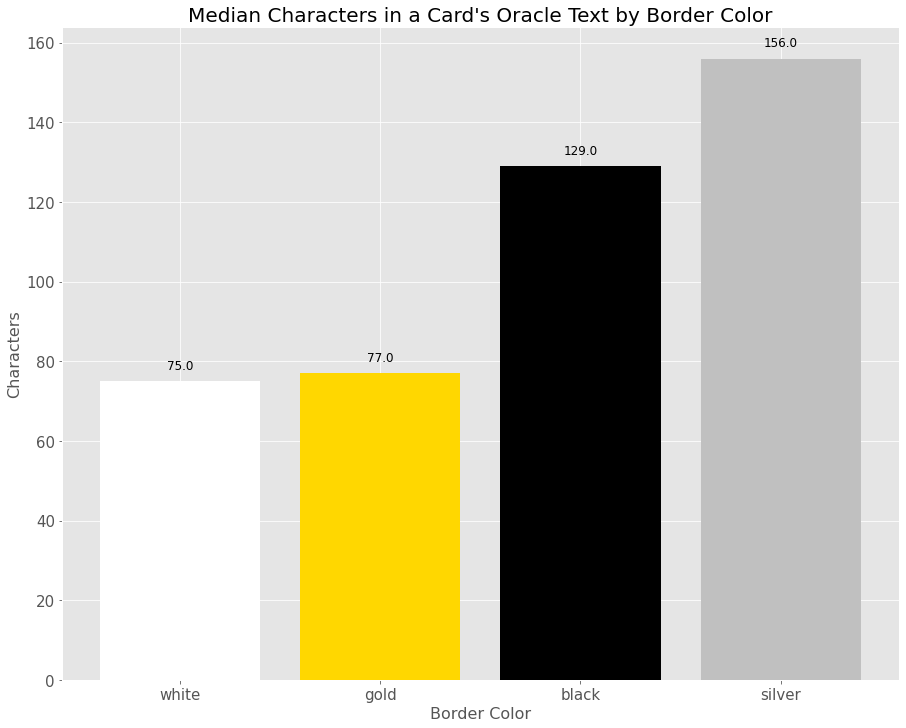

In [15]:
borderdf = df.groupby('Border Color').median()
borderdf = borderdf.drop(index = 'borderless')
borderdf = borderdf.reindex(['white', 'gold', 'black', 'silver'])

fig, ax = plt.subplots()
ax.bar(borderdf.index, borderdf['Text'], color = ['white','gold','black','silver'])
ax.set_title("Median Characters in a Card's Oracle Text by Border Color", fontsize = 20)
ax.set_xlabel('Border Color', fontsize=16)
ax.set_ylabel('Characters', fontsize=16)
fig.set_size_inches([15, 12])
for i in range(0, len(borderdf.index)):
    plt.text(borderdf.index[i], borderdf['Text'][i] + 3, borderdf['Text'][i], ha='center', size = 'large')
plt.savefig('Text by Border Color.png')

,Year,Text,CMC,Type,Rarity,Border Color,Color,Standard,Modern,Pioneer,Legacy,Vintage,Name,Creature,Artifact,Sorcery,Instant,Enchantment,Planeswalker,Legend
3,1994,197,1.0,Enchantment — Aura,rare,white,G,False,False,False,False,False,Web,False,False,False,False,True,False,False
5,2015,218,2.0,Sorcery,rare,black,G,False,False,False,False,False,Wildcall,False,False,True,False,False,False,False
9,2021,38,1.0,Creature — Bird,rare,black,G,False,False,False,False,False,Birds of Paradise,True,False,False,False,False,False,False
12,2015,128,2.0,Sorcery,common,black,G,True,True,True,True,True,Mulch,False,False,True,False,False,False,False
13,2018,164,6.0,Creature — Lizard Hydra,rare,black,G,False,False,False,False,False,Whiptongue Hydra,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64250,1993,127,3.0,Enchantment — Aura,rare,black,G,False,False,False,False,False,Kudzu,False,False,False,False,True,False,False
64260,2021,73,2.0,Instant,rare,borderless,GU,False,False,False,False,False,Growth Spiral,False,False,False,True,False,False,False
64262,2015,107,2.0,Creature — Centaur Shaman,rare,black,G,False,False,False,False,False,Herald of the Pantheon,True,False,False,False,False,False,False
64269,1999,118,2.0,Creature — Snake,uncommon,white,G,False,False,False,False,False,River Boa,True,False,False,False,False,False,False
